In [2]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np


#Se descargaron los datos de la página https://coronavirus.gob.mx/datos/#DownZCSV
#a diferencia de mis compañeros yo tuve problemas con utilizar el archivo .csv ya que
#era muy pesado y me marcaba problemas de memoria, así que lo separé en diferences archivos .csv que leí con pandas, quité 
#información innecesaria y guardé en un nuevo archivo .csv que mi computadora sí pudiera manejar



edf=pd.read_csv('200910COVID19MEXICO_0.csv', encoding='latin', low_memory=False)
edf0=pd.DataFrame(edf)

for i in range(15):
    edfi=pd.read_csv('200910COVID19MEXICO_'+str(i)+'.csv', encoding='latin', low_memory=False)
    edfi=pd.DataFrame(edfi)
    edfi.columns=edf0.columns
    edfi=edfi.drop('ID_REGISTRO',axis=1)
    edfi=edfi.drop('FECHA_ACTUALIZACION',axis=1)
    edfi=edfi.drop('FECHA_INGRESO',axis=1)
    edfi=edfi.drop('FECHA_SINTOMAS',axis=1)
    edfi=edfi.drop('TIPO_PACIENTE',axis=1)
    edfi=edfi.drop('ENTIDAD_NAC',axis=1)
    edfi=edfi.drop('ORIGEN',axis=1)
    edfi=edfi.drop('SECTOR',axis=1)
    edfi=edfi.drop('MUNICIPIO_RES',axis=1)
    edfi=edfi.drop('ENTIDAD_UM',axis=1)
    edfi=edfi.drop('INTUBADO',axis=1)
    edfi=edfi.drop('NEUMONIA',axis=1)
    edfi=edfi.drop('NACIONALIDAD',axis=1)
    edfi=edfi.drop('PAIS_NACIONALIDAD',axis=1)
    edfi=edfi.drop('PAIS_ORIGEN',axis=1)
    edfi=edfi.drop('UCI',axis=1)
    edfi=edfi.drop('MIGRANTE',axis=1)
    edfi=edfi.drop('HABLA_LENGUA_INDIG',axis=1)
    edfi=edfi.loc[edfi.FECHA_DEF!='9999-99-99',:]
    edfi=edfi.drop('FECHA_DEF',axis=1)
    edfi=edfi.loc[edfi.RESULTADO==1,:]
    edfi=edfi.drop('RESULTADO',axis=1)
    if i!=0:
        edf=edf.append(edfi)
    else:
        edf=edfi
#se filtraron los datos para quitar las personas que no tienen fecha de defunción (no fallecidas) y que no tuvieron resultado 
#positivo de la prueba de COVID. Se quitaron todas las columnas de datos que no se van a utilizar

edf.to_csv('muertes_covid.csv', index=None)

In [17]:
#se lee el csv que contiene los datos de personas que han fallecido y que tienen resultado positivo a la prueba de COVID
df=pd.read_csv('muertes_covid.csv')
df=pd.DataFrame(df)

#se hizo una lista con número de identificación de los estados de la republica para que sea más sencillo leer la información
estados = [' ', 'Aguascalientes', "Baja California", "Baja California Sur", "Campeche", "Coahuila","Colima","Chiapas","Chihuahua",
           "Distrito Federal", "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "Edo Mex", "Michoacán","Morelos", "Nayarit",
           "Nuevo León", "Oaxaca", "Puebla","Querétaro","Quintana Roo","San Luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala",
           "Veracruz","Yucatán","Zacatecas"]

#se hace una lista con los titulos de la las columnas de la tabla para facilitar la lectura de los datos al imprimir información 
#en la pantalla
titulos=list(df.columns)

#se agrupa la información en relación al sexo y se obtiene el promedio de edad de las personas fallecidas 
df6=df.groupby(['SEXO'])[['EDAD']].mean(np.array)


#se imprime el promedio de edad de fallecidos y el promedio de edad de hombres y mujeres fallecidas
print('La edad promedio de fallecimiento es '+ str(df.EDAD.mean())+'\n')
print('La edad promedio de fallecimiento en hombres es '+str(df6.EDAD[2])+ ' y en mujeres es ' +str(df6.EDAD[1])+'\n')




#se agrupa la informacion por la entidad federativa de residencia y se encuentra el estado con más muertes
max=df['ENTIDAD_RES'].value_counts()
print('El estado con más muertes es '+str(estados[max.idxmax()])+' con '+str(max.max())+' muertes\n')


#se agrupa la informacion por la entidad federativa de residencia y se encuentra el estado con menos muertes
min=df['ENTIDAD_RES'].value_counts()

print('El estado con menos muertes es '+str(estados[min.idxmin()])+' con '+str(min.min())+' muertes\n')


#se busca la menor edad registrada para personas fallecidas y se obtiene cuántas personas han muerto de esa edad
menores=df['EDAD'].value_counts()
menores.min()
print('Hay registro de  '+str(menores[menores.min()])+' niños de 1 año de edad fallecidos por COVID\n')



#se define un arreglo para introducirle información de las enfermedades que tenían las personas fallecidas con respecto a el sexo
s3=np.zeros((2,12), dtype=int)
s3[:,0]=range(1,2)

#se condiciona que el resultado sea positivo (1) y se suman los casos agrupados en sexos diferentes
for i in range(4,15):    
    rf2=df[df.iloc[:, i] == 1]
    s=rf2.groupby(['SEXO'])[titulos[i]].sum(np.array)
    s3[:,(i-3)]=s

    #se obtiene el máximo para cada sexo y se imprime
for i in range(2):
    result=np.where(s3[i,:]==np.amax(s3, axis=1)[i])
    result=np.asscalar(result[0])
    print('La comorbilidad más común entre '+labels[i]+' que han fallecido es '+str(titulos[3+result])+'\n') 


La edad promedio de fallecimiento es 62.23454751683441

La edad promedio de fallecimiento en hombres es 61.66827223262867 y en mujeres es 63.258294698649465

El estado con más muertes es Edo Mex con 10656 muertes

El estado con menos muertes es Baja California Sur con 402 muertes

Hay registro de  41 niños de 1 año de edad fallecidos por COVID

La comorbilidad más común entre Hombres que han fallecido es HIPERTENSION

La comorbilidad más común entre Mujeres que han fallecido es HIPERTENSION



c:\python36-32\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


In [35]:

#se define un arreglo para introducirle información de las enfermedades que tenían las personas fallecidas con respecto a el estado
s2=np.zeros((32,12), dtype=int)
s2[:,0]=range(1,33)


#se condiciona que el resultado sea positivo (1) y se suman los casos agrupados en los estados diferentes

for i in range(4,15):    
    rf=df[df.iloc[:, i] == 1]
    s=rf.groupby(['ENTIDAD_RES'])[titulos[i]].sum(np.array)
    s2[:,(i-3)]=s


 #se obtiene el máximo para cada sexo y se imprime

for i in range(32):
    result=np.where(s2[i,:]==np.amax(s2, axis=1)[i])
    result=np.asscalar(result[0])
    
    print('Comorbilidad más común entre fallecidos del estado de '+estados[i+1]+' es '+str(titulos[3+result])+'\n') 
    #los indices 0-3 no corresponden a enfermedades así que debemos sumarle 3 a titulos
    


Comorbilidad más común entre fallecidos del estado de Aguascalientes es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Baja California es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Baja California Sur es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Campeche es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Coahuila es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Colima es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Chiapas es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Chihuahua es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Distrito Federal es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Durango es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Guanajuato es HIPERTENSION

Comorbilidad más común entre fallecidos del estado de Guerrero es HIPERTENSION

Comorbili

c:\python36-32\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


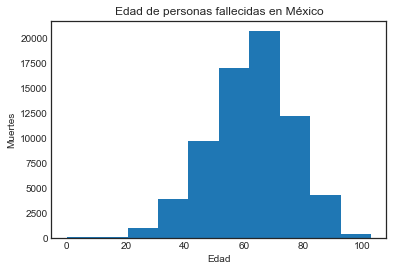

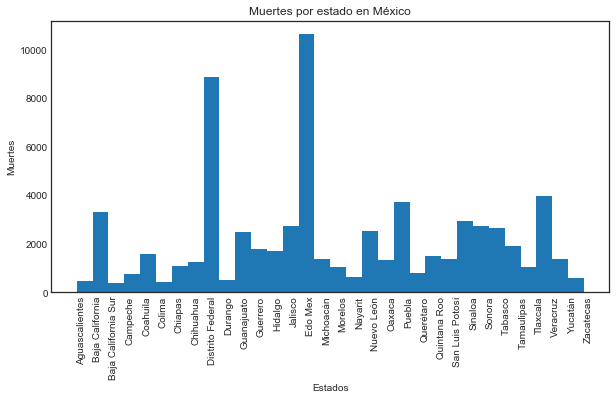

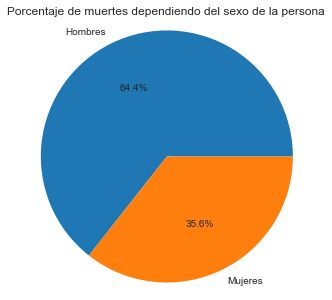

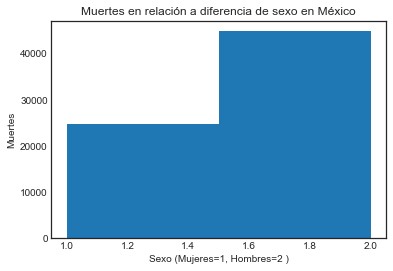

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.hist(df.EDAD)
plt.title('Edad de personas fallecidas en México')
plt.ylabel('Muertes')
plt.xlabel('Edad')
plt.show()


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xticks(np.arange(len(estados)))
ax.set_xticklabels(estados)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.hist(df.ENTIDAD_RES, bins=32)
plt.title('Muertes por estado en México')
plt.ylabel('Muertes')
plt.xlabel('Estados')
plt.show()


pay=df['SEXO'].value_counts()/df['SEXO'].value_counts().sum()

labels='Hombres','Mujeres'
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(pay, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de muertes dependiendo del sexo de la persona')
plt.show()


plt.hist(df.SEXO, bins=2)
plt.title('Muertes en relación a diferencia de sexo en México')
plt.ylabel('Muertes')
plt.xlabel('Sexo (Mujeres=1, Hombres=2 )')
plt.show()
